<a href="https://colab.research.google.com/github/anisaafn/2025_Visi-Komputer_TI-2B/blob/master/Jobsheet_3_Teknik_Regresi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1 – Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)
Bayangkan Anda memiliki ribuan gambar hitam-putih sederhana yang masing-masing berisi satu lingkaran dengan ukuran berbeda. Dari gambar-gambar itu, bisakah komputer menebak berapa besar radius lingkarannya hanya dengan melihat citra tersebut?

Di praktikum ini, kita akan membuat dataset sendiri menggunakan Python. Setiap gambar dihasilkan secara acak dengan lingkaran berwarna putih di atas latar hitam. Labelnya? Nilai radius lingkaran itu sendiri! Inilah pintu masuk untuk memahami konsep dasar regresi gambar: kita akan melatih model Convolutional Neural Network (CNN) kecil agar mampu memetakan gambar → angka.

Setelah dataset selesai dibuat, model CNN akan dibangun menggunakan Keras. Jaringan ini akan belajar dari ribuan contoh yang kita hasilkan, dan Anda akan melihat bagaimana loss berkurang di setiap epoch. Pada akhir latihan, grafik loss vs epoch akan menunjukkan apakah model Anda sudah “mengerti” bentuk lingkaran.
Menariknya, Anda dapat langsung melihat hasil prediksi dengan membuat plot antara radius sebenarnya dan hasil prediksi. Jika garis hasil hampir menyentuh garis diagonal, artinya model sudah cukup baik dalam melakukan regresi.
Tujuan belajar:
•	Memahami alur penuh regresi gambar tanpa dataset eksternal.
•	Melatih CNN sederhana untuk prediksi nilai kontinu.
•	Mengevaluasi performa dengan MAE, RMSE, dan R².


1)	Setup & Generator Dataset

Kita akan membuat dataset citra 64×64 berisi satu lingkaran putih di latar hitam. Tiap gambar punya radius dan titik pusat acak.


In [ ]:
# jalankan sekali
!pip -q install kaggle tensorflow matplotlib scikit-learn opencv-python

In [ ]:
import numpy as np, cv2
def make_sample(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r+1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r); cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img/255.).astype('float32')
    img3 = np.stack([img,img,img], axis=-1)
    return img3, float(r)

In [ ]:
from sklearn.model_selection import train_test_split
X,y = zip(*[make_sample() for _ in range(3000)])
X = np.array(X); y = np.array(y, dtype=np.float32)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
  layers.Input((64,64,3)),
  layers.Conv2D(32,3,activation='relu'), layers.MaxPool2D(),
  layers.Conv2D(64,3,activation='relu'), layers.MaxPool2D(),
  layers.Conv2D(128,3,activation='relu'),
  layers.GlobalAveragePooling2D(),
  layers.Dense(64,activation='relu'),
  layers.Dense(1) # regresi
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(Xtr,ytr, validation_data=(Xte,yte), epochs=12, batch_size=64)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 383ms/step - loss: 101.2717 - mae: 8.4272 - val_loss: 6.0768 - val_mae: 1.8099
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - loss: 3.0470 - mae: 1.3522 - val_loss: 1.5664 - val_mae: 1.0220
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 390ms/step - loss: 1.4850 - mae: 0.9906 - val_loss: 1.5005 - val_mae: 0.9888
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - loss: 1.3940 - mae: 0.9532 - val_loss: 1.5145 - val_mae: 1.0100
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 429ms/step - loss: 1.3910 - mae: 0.9678 - val_loss: 1.4417 - val_mae: 0.9741
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 393ms/step - loss: 1.4030 - mae: 0.9700 - val_loss: 1.5197 - val_mae: 1.0079
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 411ms/step - loss: 1.3758 - mae: 0.9539 - val_loss: 1.4828 - val_mae: 0.9981
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 438ms/step - loss: 1.3807 - mae: 0.9562 - val_loss: 1.7855 - val_mae: 1.1014
Epoch 9/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 396m

In [ ]:
from google.colab import files
files.upload()  # pilih kaggle.json

import os, shutil
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
!pip -q install kaggle

Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors


In [ ]:
import glob, os
files = glob.glob("/content/utk/UTKFace/*.jpg")
def parse_age(fp): return int(os.path.basename(fp).split("_")[0])
ages = [parse_age(f) for f in files]
# tampilkan beberapa contoh (matplotlib)

In [ ]:
import tensorflow as tf
IMG_SIZE = 160
def load_img(fp,label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE,IMG_SIZE))
    return img/255.0, tf.cast(label, tf.float32)
# buat train_ds, test_ds

In [ ]:
base = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3), weights='imagenet')
base.trainable=False
inputs = tf.keras.Input((IMG_SIZE,IMG_SIZE,3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs*255.0)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


D3

In [ ]:
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/competitions/data/download-all/petfinder-pawpularity-score
unzip:  cannot find or open /content/petfinder-pawpularity-score.zip, /content/petfinder-pawpularity-score.zip.zip or /content/petfinder-pawpularity-score.zip.ZIP.


In [ ]:
base = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224,224,3), weights='imagenet')
base.trainable=False
# tambahkan GAP, Dropout(0.3), Dense(256), Dense(1)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


-------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
    # radius acak
    r = np.random.randint(min_r, max_r + 1)

    # buat canvas hitam
    img = np.zeros((img_size, img_size), dtype=np.uint8)

    # posisi pusat lingkaran acak
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)

    # gambar lingkaran putih terisi
    cv2.circle(img, (cx, cy), r, (255,), -1)

    # normalisasi ke [0,1]
    img = (img / 255.0).astype(np.float32)

    # ubah ke 3-channel agar kompatibel dengan CNN
    img3 = np.stack([img, img, img], axis=-1)

    return img3, float(r), (cx, cy)

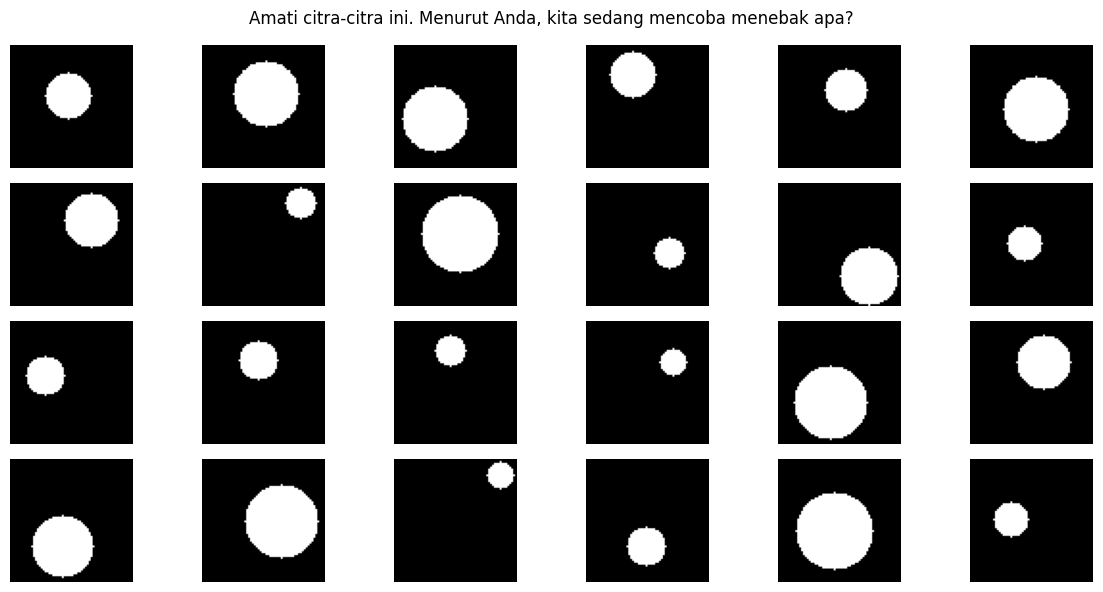

In [2]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]

# Pisahkan komponen hasil
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]

# Grid gambar tanpa label
cols = 6
rows = N_show // cols

plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.axis('off')

plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?", fontsize=12)
plt.tight_layout()
plt.show()


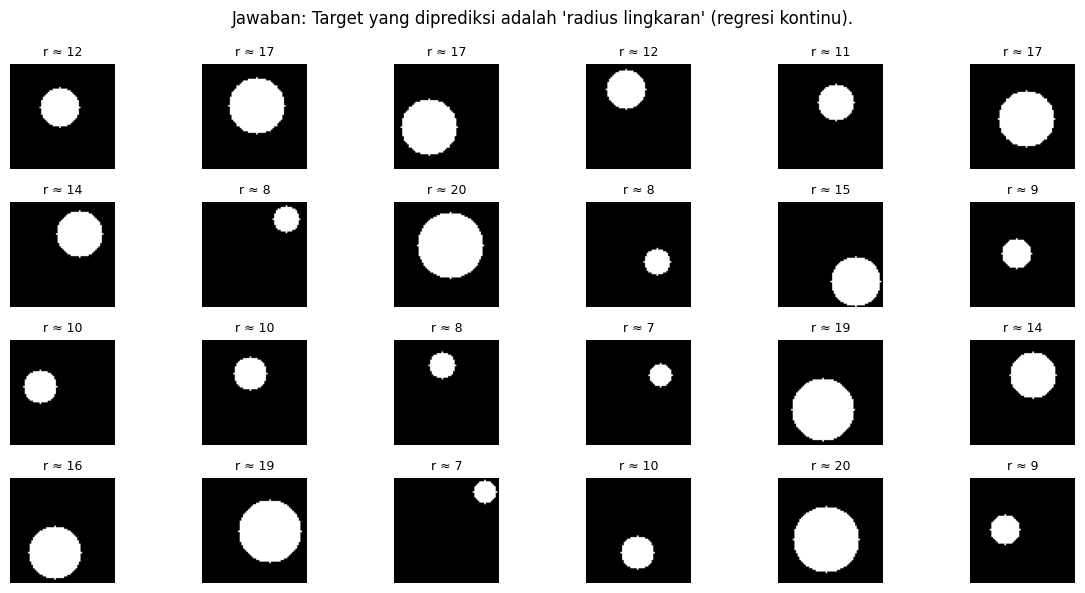

In [3]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))

for i in range(N_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.title(f"r ≈ {int(rads[i])}", fontsize=9)
    plt.axis('off')

plt.suptitle(
    "Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).",
    fontsize=12
)
plt.tight_layout()
plt.show()

In [4]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Bagi dataset menjadi train dan test
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # output regresi
])

# Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training model
history = model.fit(
    Xtr, ytr,
    validation_data=(Xte, yte),
    epochs=12,
    batch_size=64,
    verbose=0
)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred) ** 2)))
r2 = r2_score(yte, y_pred)

print(f"MAE = {mae:.3f} | RMSE = {rmse:.3f} | R² = {r2:.3f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
MAE = 0.956 | RMSE = 1.168 | R² = 0.935


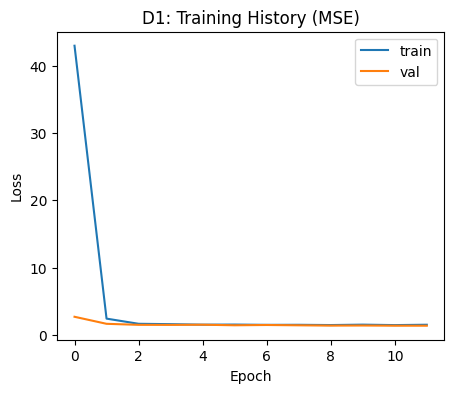

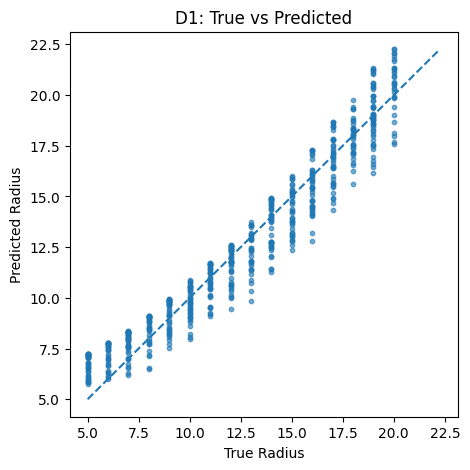

In [6]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()